## Unsupervised Learning Eploration with Census Dataset
*get it? CellPhone!!!!*

By. Dr. Vukosi Marivate http://www.vima.co.za

In [1]:
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_stata("../data/sa-census-2011-household-v1.1-20140618.dta")

In [5]:
df.columns

Index([u'QN_TYPE', u'SN', u'H01_QUARTERS', u'H02_MAINDWELLING',
       u'H02_OTHERDWELLING', u'H02A_ROOF', u'H02A_WALL', u'H03_DININGROOMS',
       u'H03_LIVINGROOMS', u'H03_DINING_LIVING', u'H03_BEDROOMS',
       u'H03_STUDYROOMS', u'H03_MULTIPLE_USE', u'H03_OTHERROOMS',
       u'H03_TOTROOMS', u'H04_TENURE', u'H07_WATERPIPED', u'H08_WATERSOURCE',
       u'H09_WATERSUPPLY', u'H09A_WATERSUPPLY', u'H09B_ALT_WATERSOURCE',
       u'H10_TOILET', u'H11_ENERGY_COOKING', u'H11_ENERGY_HEATING',
       u'H11_ENERGY_LIGHTING', u'H12_REFUSE', u'H13_REFRIDGERATOR',
       u'H13_STOVE', u'H13_VACUUM', u'H13_WASHINGM', u'H13_COMPUTER',
       u'H13_SATELLITE', u'H13_DVD_PLAYER', u'H13_MOTORCAR', u'H13_TV',
       u'H13_RADIO', u'H13_LANDLINE', u'H13_CELLPHONE', u'H13_POSTBOX',
       u'H13_RESIDENTIAL_MAIL', u'H13A_INTERNET', u'HM00_DEATHS',
       u'HM00A_DEATHSNO', u'DERH_HHAGE', u'DERH_HHPOP', u'DERH_HHSEX',
       u'DERH_HINCOME', u'DERH_HH_EMPLOY_STATUS', u'DERH_HSIZE', u'DERH_XPOP',
       u'D

In [7]:
df.head()

,QN_TYPE,SN,H01_QUARTERS,H02_MAINDWELLING,H02_OTHERDWELLING,H02A_ROOF,H02A_WALL,H03_DININGROOMS,H03_LIVINGROOMS,H03_DINING_LIVING,...,DERH_HINCOME,DERH_HH_EMPLOY_STATUS,DERH_HSIZE,DERH_XPOP,DERH_INCOME_CLASS,H_GEOTYPE,H_PROVINCE,H_DISTRICT,H_MUNIC,HHLD_10PERCENT_WGT
0,Household questionnaire,1.180804e+10,Housing Unit,House or brick/concrete block structure on a s...,Unspecified,Asbestos,Brick,0,0,0,...,13576,Employed,5,Coloured,R 19201 - R 38400,Farms,Western cape,West Coast,Matzikama,11.492307
1,Household questionnaire,1.180804e+10,Housing Unit,House or brick/concrete block structure on a s...,House or brick/concrete block structure on a s...,Asbestos,Brick,1,1,0,...,13576,Employed,2,White,R 19201 - R 38400,Farms,Western cape,West Coast,Matzikama,28.351370
2,Household questionnaire,1.180804e+10,Housing Unit,House or brick/concrete block structure on a s...,Unspecified,Asbestos,Brick,0,0,1,...,13576,Employed,3,Coloured,R 19201 - R 38400,Farms,Western cape,West Coast,Matzikama,16.701496
3,Household questionnaire,1.180804e+10,Housing Unit,House or brick/concrete block structure on a s...,Unspecified,Asbestos,Brick,0,0,0,...,13576,Employed,4,Coloured,R 38401 - R 76800,Farms,Western cape,West Coast,Matzikama,16.701496
4,Household questionnaire,1.180835e+10,Housing Unit,House or brick/concrete block structure on a s...,Unspecified,Asbestos,Brick,0,1,1,...,868893,Employed,4,White,R 614401- R 1228800,Farms,Western cape,West Coast,Matzikama,16.701496


Dropping any rows with missing values. This is extreme, you can do some imputation if needed.

In [9]:
df = df.dropna()

Lets get rid of that timestamp 

In [10]:
df = df.drop(['Timestamp'],axis=1)

In [26]:
#Some default stuff for my plotting
aspect_mult = 0.9
figsize(aspect_mult*16,aspect_mult*9)
linewidth = 3

Currently the data is not really in a nice format for Machine learning methods. Most methods don't deal well with categorical data (like Brand and Broken Screen). Let's do some one-hot-encoding.

In [15]:
#One Hot Encoding
cat_cols = ["Brand","Broken_Screen"]
df_continuous = pd.get_dummies(df,columns=cat_cols)
df_continuous.columns

Index([u'Age', u'Buying_Price', u'Camera', u'Battery', u'Screen_Size',
       u'Condition', u'Proposed_Sell_Price',
       u'Internal Storage Size in Gigabytes (GB)', u'Brand_Alcatel onetouch',
       u'Brand_Apple', u'Brand_Azpen', u'Brand_BlackBerry', u'Brand_HTC',
       u'Brand_Hisense', u'Brand_Huawei', u'Brand_Infinix', u'Brand_LG',
       u'Brand_Nokia', u'Brand_Samsung', u'Brand_Sony', u'Brand_Sony ',
       u'Brand_Vodafone', u'Brand_Xiaomi', u'Brand_ZTE', u'Broken_Screen_No',
       u'Broken_Screen_Yes'],
      dtype='object')

In [16]:
df_continuous.head()

,Age,Buying_Price,Camera,Battery,Screen_Size,Condition,Proposed_Sell_Price,Internal Storage Size in Gigabytes (GB),Brand_Alcatel onetouch,Brand_Apple,...,Brand_LG,Brand_Nokia,Brand_Samsung,Brand_Sony,Brand_Sony,Brand_Vodafone,Brand_Xiaomi,Brand_ZTE,Broken_Screen_No,Broken_Screen_Yes
0,8,160,5.0,24,4.5,7,2000.0,8.0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,19,207,4.0,12,3.5,8,3000.0,5.0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,9,250,2.0,4,3.5,5,200.0,2.0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,19,650,2.0,14,3.5,9,400.0,1.0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,13,699,2.0,10,3.2,7,450.0,4.0,0,0,...,0,0,0,0,0,1,0,0,1,0


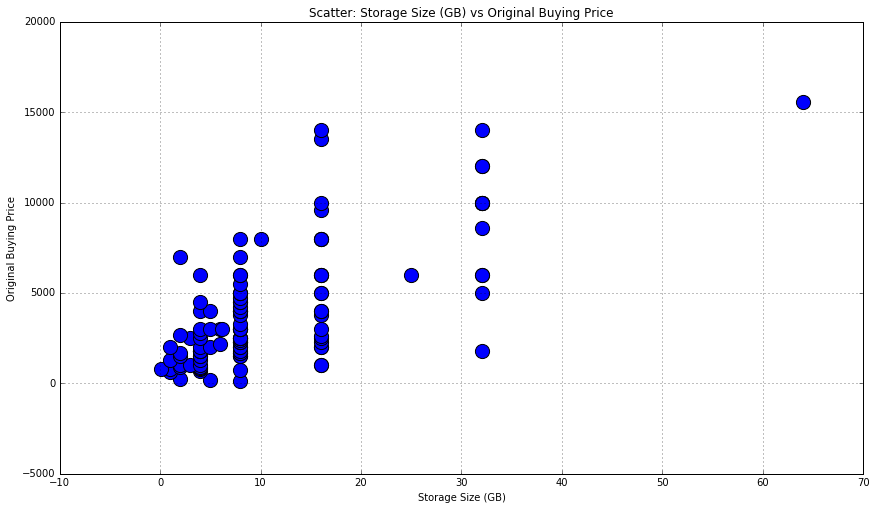

In [20]:
plt.scatter(df_continuous['Internal Storage Size in Gigabytes (GB)'], 
            df_continuous.Buying_Price, 
            s = 200)
#Add some context to the plot
plt.title("Scatter: Storage Size (GB) vs Original Buying Price")
plt.xlabel("Storage Size (GB)")
plt.ylabel("Original Buying Price")
plt.grid()

## Clustering

In [21]:
from sklearn.cluster import KMeans

In [38]:
X = df_continuous.values
reps = 3

In [42]:
within_cluster = []
x_range = range(2,31)
for k in x_range:
    temp_wc = []
    for i in range(reps):
        clf = KMeans(n_clusters=k,n_jobs=-1)
        clf.fit(X)
        temp_wc.append(clf.inertia_)
    within_cluster.append(temp_wc)
within_cluster = np.array(within_cluster)

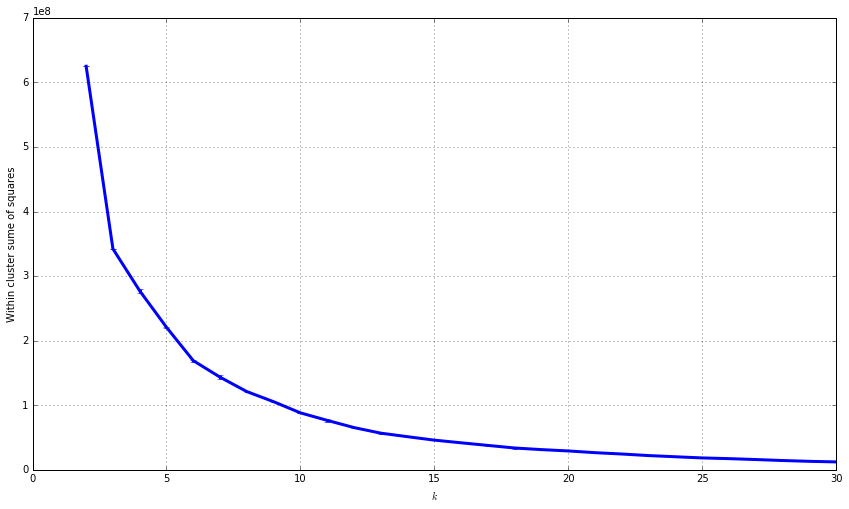

In [43]:
pyplot.errorbar(x_range,np.mean(within_cluster,axis=1),
                yerr = np.std(within_cluster,axis=1), linewidth=linewidth)
plt.ylabel("Within cluster sume of squares")
plt.xlabel("$k$")
plt.grid()

In [47]:
k = 10

In [48]:
clf = KMeans(n_clusters=k,n_jobs=-1)
clf.fit(X)
cluster_labels = clf.predict(X)

In [54]:
c= ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, k)]
cluster_colors = []

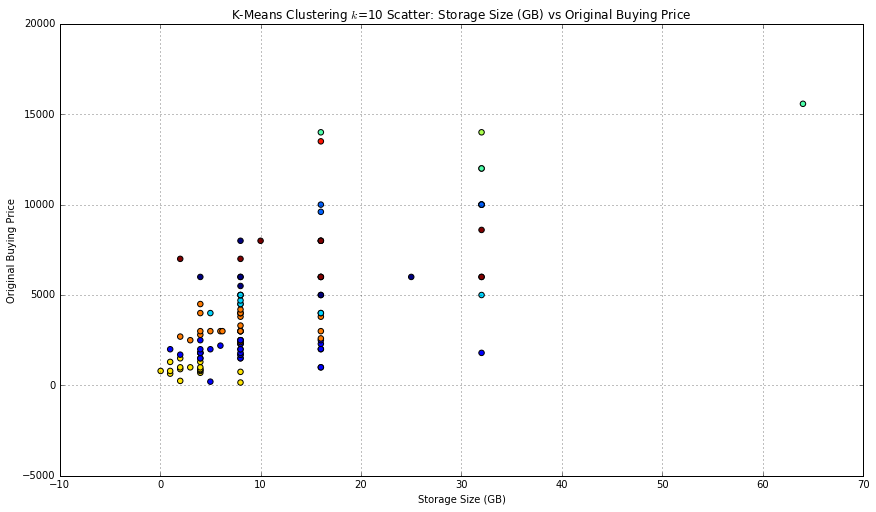

In [56]:
plt.scatter(df_continuous['Internal Storage Size in Gigabytes (GB)'],
            df_continuous.Buying_Price, c=cluster_labels,
            s=30,label=cluster_labels)
plt.title("Clustering Bag Words $k=20$",fontsize=20)
plt.title("K-Means Clustering $k$=" + str(k)+ " Scatter: Storage Size (GB) vs Original Buying Price")
plt.xlabel("Storage Size (GB)")
plt.ylabel("Original Buying Price")
plt.grid()


In [58]:
X_standardised = (df_continuous.values -np.mean(df_continuous.values))/np.std(df_continuous.values)

In [59]:
within_cluster = []
x_range = range(2,31)
for k in x_range:
    temp_wc = []
    for i in range(reps):
        clf = KMeans(n_clusters=k,n_jobs=-1)
        clf.fit(X_standardised)
        temp_wc.append(clf.inertia_)
    within_cluster.append(temp_wc)
within_cluster = np.array(within_cluster)

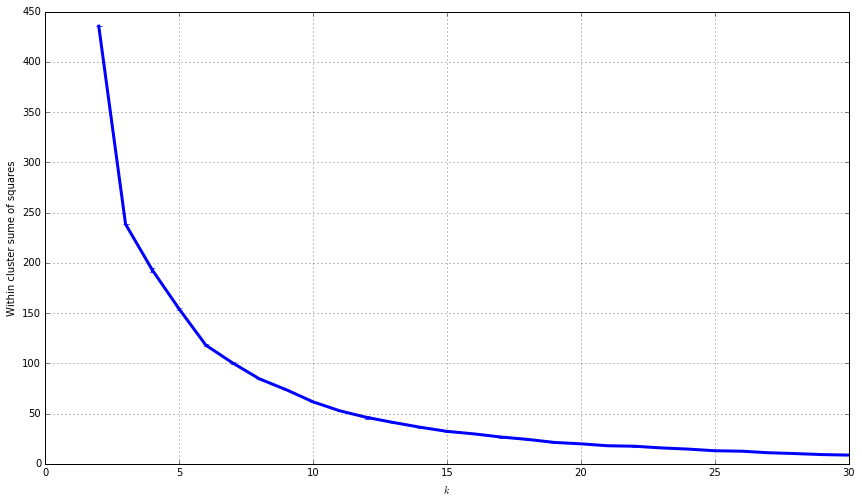

In [60]:
pyplot.errorbar(x_range,np.mean(within_cluster,axis=1),
                yerr = np.std(within_cluster,axis=1), linewidth=linewidth)
plt.ylabel("Within cluster sume of squares")
plt.xlabel("$k$")
plt.grid()

In [69]:
clf = KMeans(n_clusters=k,n_jobs=-1)
clf.fit(X_standardised)
cluster_labels = clf.predict(X_standardised)

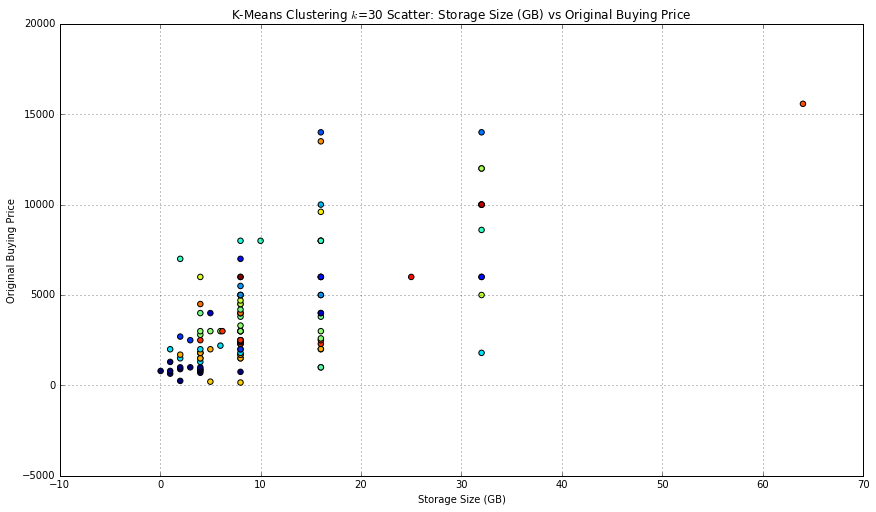

In [62]:
plt.scatter(df_continuous['Internal Storage Size in Gigabytes (GB)'],
            df_continuous.Buying_Price, c=cluster_labels,
            s=30,label=cluster_labels)
plt.title("K-Means Clustering $k$=" + str(k)+ " Scatter: Storage Size (GB) vs Original Buying Price")
plt.xlabel("Storage Size (GB)")
plt.ylabel("Original Buying Price")
plt.grid()


In [63]:
from sklearn.decomposition import PCA

In [64]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [66]:
X_pca = pca.transform(X)
X_pca.shape

(115, 2)

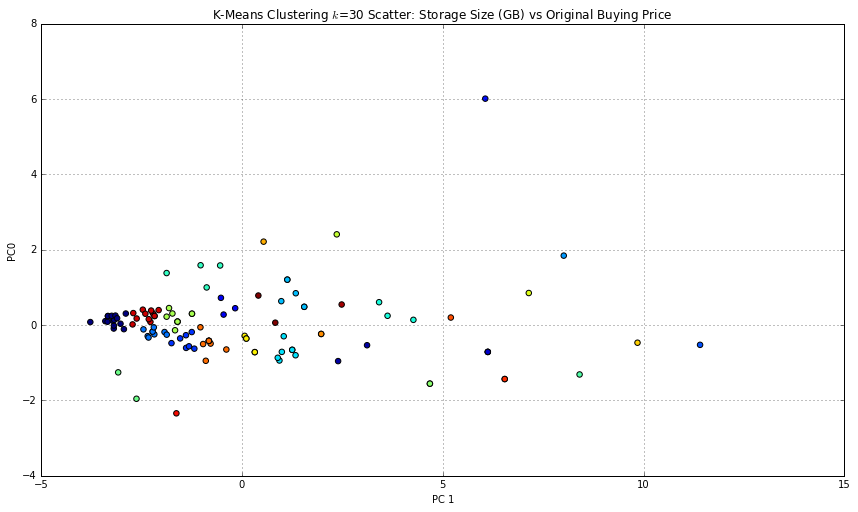

In [79]:
plt.scatter(X_pca[:,0],X_pca[:,1], c=cluster_labels,
            s=30,label=cluster_labels)
plt.title("K-Means Clustering $k$=" + str(k)+ " Scatter: Storage Size (GB) vs Original Buying Price")
plt.xlabel("PC 1")
plt.ylabel("PC0")
plt.grid()

In [73]:
from sklearn.manifold import TSNE

In [81]:
tsne = TSNE(n_components=2)

In [82]:
X_tsne = tsne.fit_transform(X)

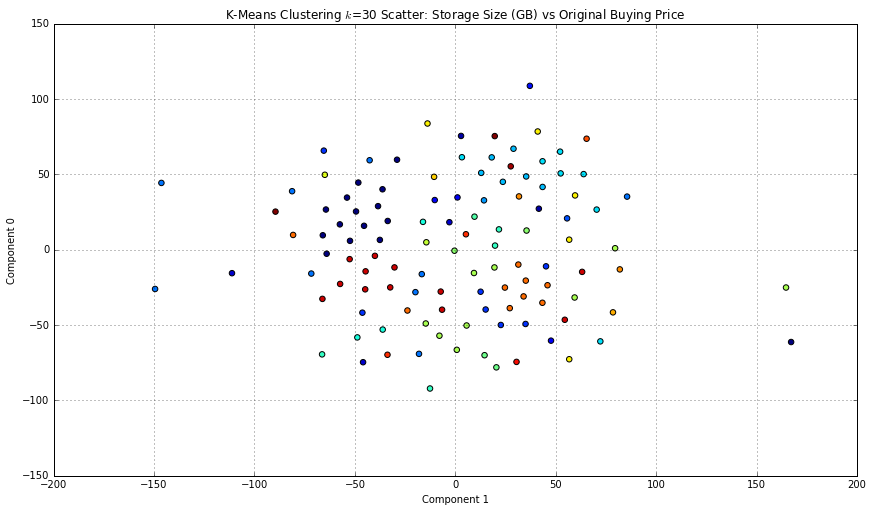

In [83]:
plt.scatter(X_tsne[:,0],X_tsne[:,1], c=cluster_labels,
            s=30,label=cluster_labels)
plt.title("K-Means Clustering $k$=" + str(k)+ " Scatter: Storage Size (GB) vs Original Buying Price")
plt.xlabel("Component 1")
plt.ylabel("Component 0")
plt.grid()